In [31]:
import pandas as pd
import seaborn as sns

In [32]:
titanic = pd.read_csv("titanic-2.csv")

In [33]:
titanic

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [34]:
titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis= 'columns', inplace=True)

In [35]:
titanic

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [36]:
titanic.isna().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


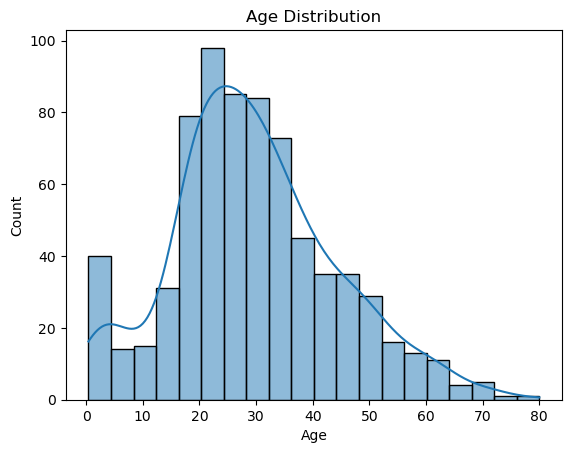

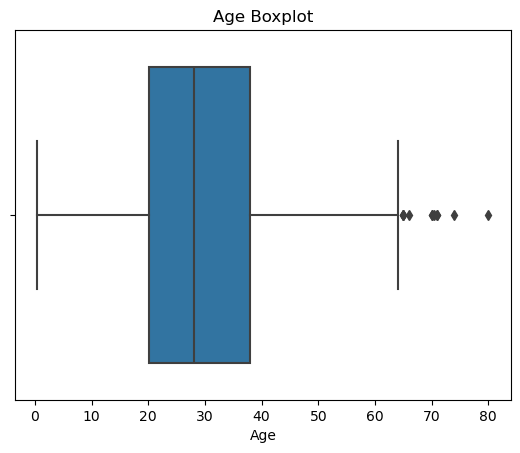

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot
sns.boxplot(x=titanic['Age'])
plt.title('Age Boxplot')
plt.show()


In [38]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

In [39]:
titanic[:6]

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
5,3,male,28.0,8.4583,0


In [40]:
dummies = pd.get_dummies(titanic['Sex']).astype(int)
dummies.head()


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [41]:
titanic = pd.concat([titanic,dummies],axis= 'columns')
titanic

,Pclass,Sex,Age,Fare,Survived,female,male
0,3,male,22.0,7.2500,0,0,1
1,1,female,38.0,71.2833,1,1,0
2,3,female,26.0,7.9250,1,1,0
3,1,female,35.0,53.1000,1,1,0
4,3,male,35.0,8.0500,0,0,1
...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,0,1
887,1,female,19.0,30.0000,1,1,0
888,3,female,28.0,23.4500,0,1,0
889,1,male,26.0,30.0000,1,0,1


In [43]:
target = titanic.Survived


In [44]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [59]:
inputs = titanic.drop('Survived', axis ='columns')

In [60]:
inputs

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,28.0,23.4500,1,0
889,1,male,26.0,30.0000,0,1


In [61]:
inputs = inputs.drop('Sex', axis ='columns')

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [63]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target, test_size=0.2)

In [64]:
gb = GaussianNB()

In [65]:
gb.fit(X_train,y_train)

GaussianNB()

In [66]:
X_test.head(10)

,Pclass,Age,Fare,female,male
703,3,25.0,7.7417,0,1
505,1,18.0,108.9000,0,1
77,3,28.0,8.0500,0,1
207,3,26.0,18.7875,0,1
691,3,4.0,13.4167,1,0
277,2,28.0,0.0000,0,1
130,3,33.0,7.8958,0,1
875,3,15.0,7.2250,1,0
281,3,28.0,7.8542,0,1
869,3,4.0,11.1333,0,1


In [68]:
y_test.head(10)

703    0
505    0
77     0
207    1
691    1
277    0
130    0
875    1
281    0
869    1
Name: Survived, dtype: int64

In [69]:
gb.predict(X_test[:10])

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [70]:
gb.score(X_test,y_test)

0.7877094972067039